# Data Preprocessing

Описание дынных. 
- Исходный датасет имеет 10 переменных.
- 9 первых переменных - это независимые. 
- Последняя переменная "Category" - зависимая переменная. 
- Переменная "Category" состоит из двух типов: 0 и 1, где 0 - это здоровые люди, 1 - заболевшие. 
- Конвертируем наш документ, осуществим подготовку данных, импортируем необходимые библиотеки.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('КР2.csv', sep=',')

Имеем 10 столбцов, 615 строк.

In [3]:
df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
0,32,m,38.5,52.5,7.7,22.1,7.5,3.23,106.0,0
1,32,m,38.5,70.3,18.0,24.7,3.9,4.80,74.0,0
2,32,m,46.9,74.7,36.2,52.6,6.1,5.20,86.0,0
3,32,m,43.2,52.0,30.6,22.6,18.9,4.74,80.0,0
4,32,m,39.2,74.1,32.6,24.8,9.6,4.32,76.0,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,110.3,50.0,6.30,55.7,1
611,64,f,24.0,102.8,2.9,44.4,20.0,3.02,63.0,1
612,64,f,29.0,87.3,3.5,99.0,48.0,3.63,66.7,1
613,46,f,33.0,NaN,39.0,62.0,20.0,4.20,52.0,1


Построим графики распределения функций.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


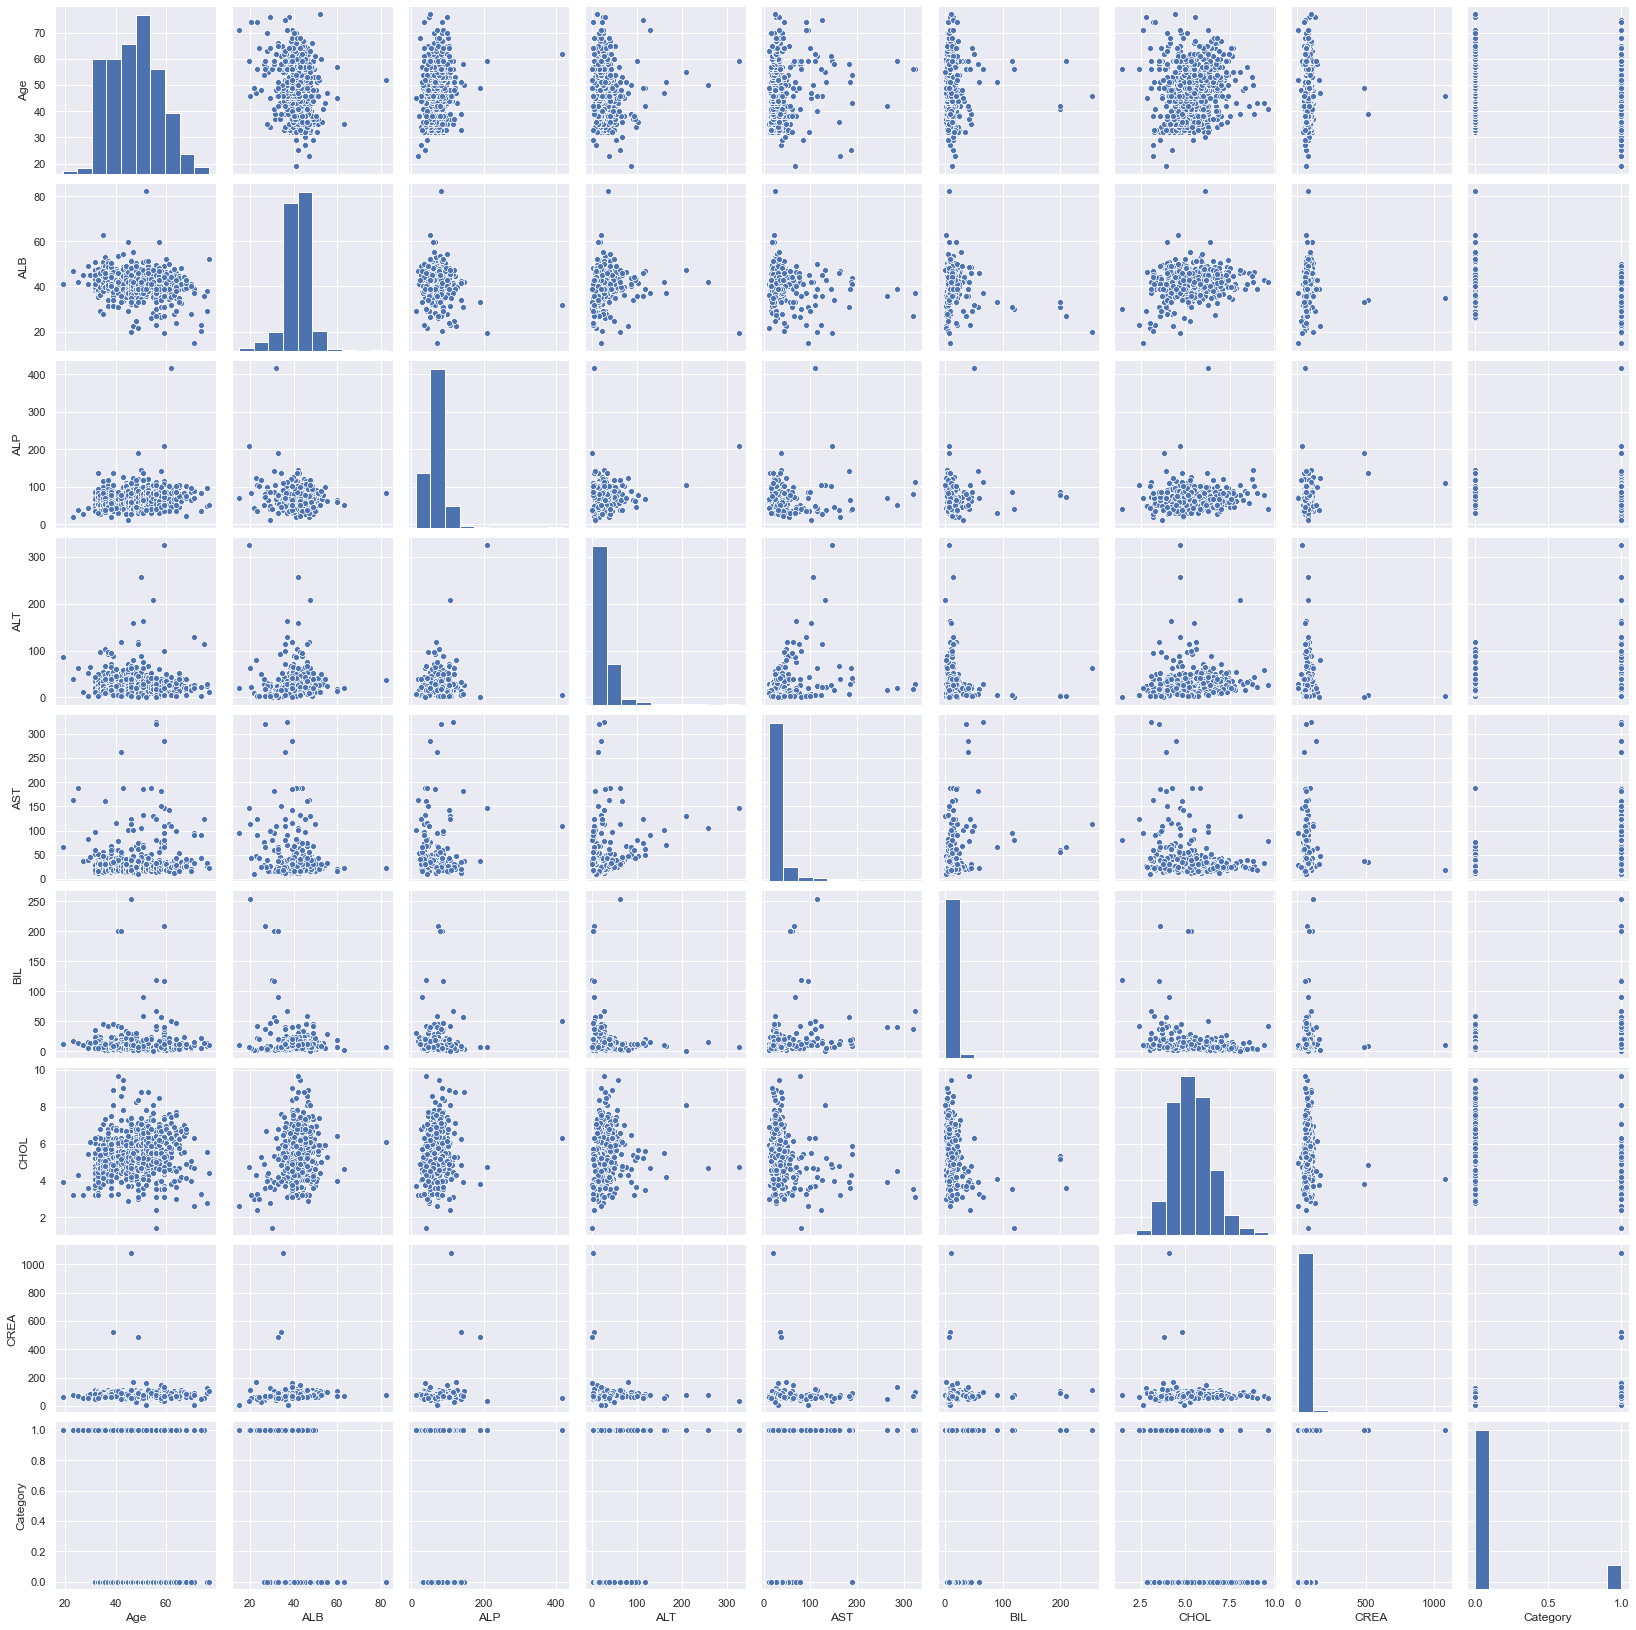

In [4]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Произведем логарифмирование для искаженных показателей

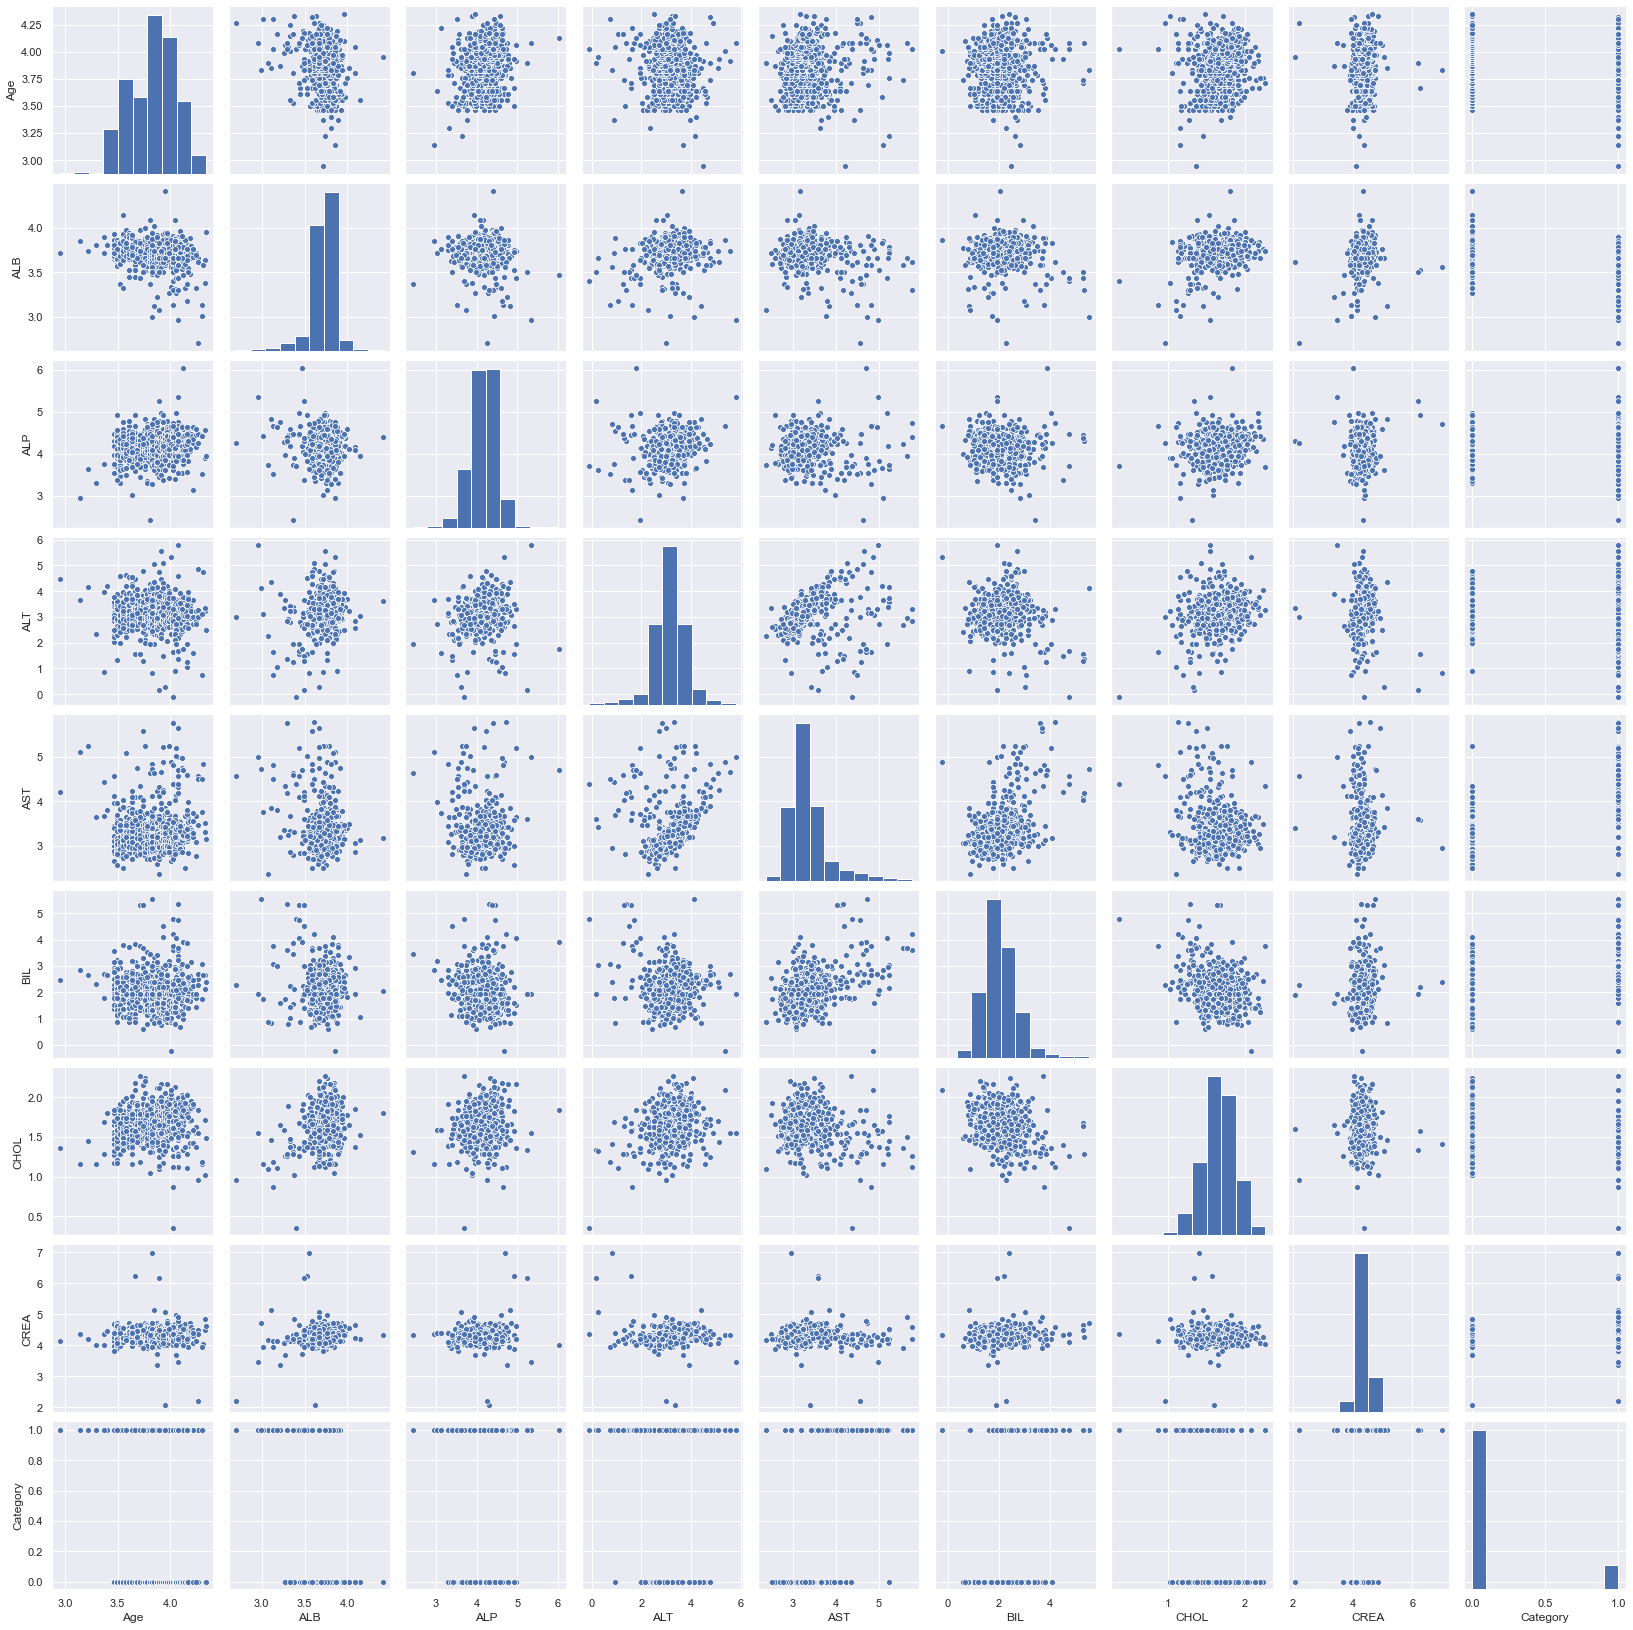

In [5]:
# Log Transformations for Skewed Distributions
df_1 = df.copy()
df_1[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHOL', 'CREA']] = np.log(df_1[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHOL', 'CREA']])
sns.set()
sns.pairplot(df_1, size = 2.5)
plt.show();

Выведем статистику по числовым переменным, в переменных "ALB", "ALP", "ALT", "CHOL" есть пропущенные значения.

In [8]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,605.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,5.368099,81.287805,0.133333
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,1.132728,49.756166,0.340211
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.430000,8.000000,0.000000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,4.610000,67.000000,0.000000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,5.300000,77.000000,0.000000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,6.060000,88.000000,0.000000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,9.670000,1079.100000,1.000000


- Осуществим работы с выбросами в числовых переменных
- применим функцию для поиска и замены данных, выходящих за пределы 3 сигма. 

In [9]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

- Запишем в наш датасет уже очищенные от  выбросов переменные и выведем статистику повторно
- В результате выполнения очистки наблюдаем, что максимальное, минимальное, среднее значения и стандартное отклонение изменились по всем числовым переменным, кроме "Age" и соответствуют нормальному распределению. 
- Это говорит об отсутствии выбросов.

In [10]:
# Outliers
df = outliers(df)
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,605.000000,615.000000,615.000000
mean,47.408130,41.619034,67.653445,27.374917,33.139378,10.263274,5.365605,79.023852,0.133333
std,10.055105,5.368663,21.123725,18.312519,23.652140,10.138949,1.118583,19.472858,0.340211
min,19.000000,24.278307,11.300000,0.900000,10.600000,0.800000,1.969914,8.000000,0.000000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,4.610000,67.000000,0.000000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,5.300000,77.000000,0.000000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,6.060000,88.000000,0.000000
max,77.000000,58.495497,146.368865,104.859881,134.058412,70.416197,8.758481,230.556303,1.000000


Проведем проверку типов данных по переменным и выявим соответствие.

In [11]:
df.dtypes

Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHOL        float64
CREA        float64
Category      int64
dtype: object

- Следующим этапом подготовки данных будет проверка и заполнение пропущенных значений.
- Выведем общее количество и процент пропусков по переменным.
- 4 переменных имеют пропущенные значения.

In [12]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ALP,18,0.029268
CHOL,10,0.016260
ALT,1,0.001626
ALB,1,0.001626
Category,0,0.000000
CREA,0,0.000000
BIL,0,0.000000
AST,0,0.000000
Sex,0,0.000000
Age,0,0.000000


- для числовых переменных заполняем пропуски средними значениями.

In [13]:
# Function Missing data (numeric)
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

Записываем в нашщ датафрейм уже очищенные данные.

In [14]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

Повторно делаем проверку, которая указывает на отсутствие пропусков в данных

In [15]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.0
CREA,0,0.0
CHOL,0,0.0
BIL,0,0.0
AST,0,0.0
ALT,0,0.0
ALP,0,0.0
ALB,0,0.0
Sex,0,0.0
Age,0,0.0


Повторно выведем статистику и убедимся, что данные подготовлены и могут использоваться для моделирования.

In [16]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.619034,67.653445,27.374917,33.139378,10.263274,5.365605,79.023852,0.133333
std,10.055105,5.364289,20.811790,18.297601,23.652140,10.138949,1.109437,19.472858,0.340211
min,19.000000,24.278307,11.300000,0.900000,10.600000,0.800000,1.969914,8.000000,0.000000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,4.620000,67.000000,0.000000
50%,47.000000,41.900000,66.700000,23.000000,25.900000,7.300000,5.310000,77.000000,0.000000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,6.055000,88.000000,0.000000
max,77.000000,58.495497,146.368865,104.859881,134.058412,70.416197,8.758481,230.556303,1.000000


- Построим корреляционную матрицую 
- Данная матрица необходима для визуализации и выявления наиболее значимых факторов, которые необходимо будет включить в модель.
- наибольшее значение имеет переменная AST, потом BIL, потом CHOL

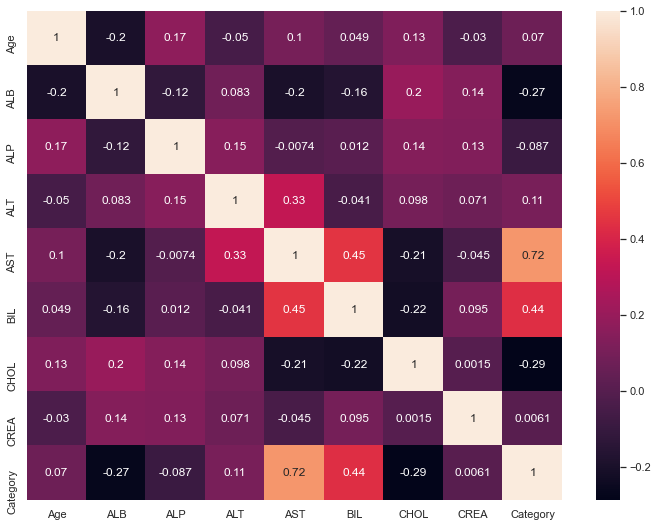

In [17]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

# Logistic Regression

- первым шагом закодируем наши текстовые переменные Sex. 
- запишем закодированные данные и выводим результат.

In [18]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [19]:
# Encoding categorical data
df = encoding_char(df)

In [20]:
df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
0,32.0,0,38.500000,52.500000,7.7,22.1,7.5,3.23,106.0,0.0
1,32.0,0,38.500000,70.300000,18.0,24.7,3.9,4.80,74.0,0.0
2,32.0,0,46.900000,74.700000,36.2,52.6,6.1,5.20,86.0,0.0
3,32.0,0,43.200000,52.000000,30.6,22.6,18.9,4.74,80.0,0.0
4,32.0,0,39.200000,74.100000,32.6,24.8,9.6,4.32,76.0,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,1,32.000000,146.368865,5.9,110.3,50.0,6.30,55.7,1.0
611,64.0,1,24.278307,102.800000,2.9,44.4,20.0,3.02,63.0,1.0
612,64.0,1,29.000000,87.300000,3.5,99.0,48.0,3.63,66.7,1.0
613,46.0,1,33.000000,67.653445,39.0,62.0,20.0,4.20,52.0,1.0


Поделим выборку на обучающую и тестовую (20%), запишем разделенные данные.

In [21]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

Произведем шкалирование данных, использя выборку train оценим параметры, затем преобразуем обучающую и тестовую выборки.

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

- Построим базовую модель и выведем по ней отчет. 
- значимыми являются переменнные Х3, Х5, Х6, Х7, где P-value не привышает порог в 3 %.
- порог в 1% не превышают переменные все те же 4 переменные

In [23]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.330582
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.169     
Dependent Variable: y                AIC:              343.2926  
Date:               2020-12-26 12:48 BIC:              381.0789  
No. Observations:   492              Log-Likelihood:   -162.65   
Df Model:           8                LL-Null:          -195.80   
Df Residuals:       483              LLR p-value:      2.6616e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.0799      0.1524    -0.5245    0.6000    -0.3787     0.2188
x2     0.0412      0.1653     0.2493    0.8031    -0.2

- проведем автоматический отбор. Как видим, была отобрана только одна переменая Х5

In [24]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

1
[False False False False False  True False False False]
[9 8 5 6 3 1 4 2 7]


Выведем индексы отобранных переменных.

In [25]:
# Selected Features
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[5]
№	Index	Feature
0	5	AST


- преобразуем нашу выборку, оставив в ней только значимые переменные.
- т.к. переменные, где показатель не превышает 3% и 1%, совпадают, имеем право оставить все 4

In [26]:
# p-value < 3% Features
X_train = X_train[:,[2,4,5,6]]
X_test = X_test[:,[2,4,5,6]]

Обучим модель логистическй регрессии на 4 переменных.

In [27]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

Проведем прогноз на тестовой выборке и оценим качетво модели. Уровень качества высокий, 95,93% объектов распознаны верно.

In [28]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.959349593495935

Выведем таблицу сопряженности, которая показывает, что 5 позитивных объектов распознаны как негативные, а 0
негативных определены как позитивные.

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[108   0]
 [  5  10]]


Произведем расчет доли ошибки, чувствителности и специфичности модели.

In [30]:
Error_rate = (5+0)/(123)
Error_rate

0.04065040650406504

In [31]:
Se = 10/(10+5)
Se

0.6666666666666666

In [32]:
Sp = 108/(108+0)
Sp

1.0

Итак, можно увидеть, что в модели логистической регрессии чувствительность составляет 66%, специфичность 100%.Это говорит, что модел отлично определяет истинно негативные случаи.
Доля ошибки низкая = 4%, точность высокая = 95,93%.
Это наш базовый уровень для построения Нейронных сетей.

К сожалению,визуализировать данные не представляется возможным из-за количества взятых переменных.

# Classification Neural Network

Подключим библиотеки, необходимые для работы с нейронными сетями.

In [35]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

 - Построим нейронную сеть прямой передачи сигнала: 
 - необходимо создавать сужающую структуру из-за работы с моделью классификации. 
 - из-за выбора 4х параметров классификации, на входном слое НС будет 4 нейронов, 
 - на первом слое возьмем количество меньшее, равное 3. 
- На втором слое возьмем 1 нейрон, так как мы имеем всего два класса (число выходов в начем случае = 2-1). 
- из-за эндогенной переменной будем использовать сигмоидальную функцию активации, т.к. она изменяется в диапазоне от 0 до 1.

In [37]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))

# Adding the output layer
cnn.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Обучаем модель партиями по 8 объектов в течении 100 эпох.

In [39]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 8, epoch = 100, validation_data=(X_test, y_test))

Epoch 1/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.8638 - val_loss: 0.6632 - val_accuracy: 0.8780
Epoch 2/100
62/62 [==============================] - 0s 1ms/step - loss: 0.6403 - accuracy: 0.8638 - val_loss: 0.6113 - val_accuracy: 0.8780
Epoch 3/100
62/62 [==============================] - 0s 1ms/step - loss: 0.5767 - accuracy: 0.8638 - val_loss: 0.5381 - val_accuracy: 0.8780
Epoch 4/100
62/62 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.8638 - val_loss: 0.4622 - val_accuracy: 0.8780
Epoch 5/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8638 - val_loss: 0.3962 - val_accuracy: 0.8780
Epoch 6/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8638 - val_loss: 0.3452 - val_accuracy: 0.8780
Epoch 7/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8638 - val_loss: 0.3096 - val_accuracy: 0.8780
Epoch 8/100
6

62/62 [==============================] - 0s 920us/step - loss: 0.1663 - accuracy: 0.9512 - val_loss: 0.1832 - val_accuracy: 0.9593
Epoch 59/100
62/62 [==============================] - 0s 887us/step - loss: 0.1656 - accuracy: 0.9512 - val_loss: 0.1829 - val_accuracy: 0.9593
Epoch 60/100
62/62 [==============================] - 0s 855us/step - loss: 0.1654 - accuracy: 0.9512 - val_loss: 0.1816 - val_accuracy: 0.9593
Epoch 61/100
62/62 [==============================] - 0s 839us/step - loss: 0.1646 - accuracy: 0.9492 - val_loss: 0.1819 - val_accuracy: 0.9593
Epoch 62/100
62/62 [==============================] - 0s 887us/step - loss: 0.1639 - accuracy: 0.9472 - val_loss: 0.1819 - val_accuracy: 0.9593
Epoch 63/100
62/62 [==============================] - 0s 855us/step - loss: 0.1633 - accuracy: 0.9512 - val_loss: 0.1806 - val_accuracy: 0.9593
Epoch 64/100
62/62 [==============================] - 0s 758us/step - loss: 0.1629 - accuracy: 0.9492 - val_loss: 0.1805 - val_accuracy: 0.9593
Epoch

Произведем прогноз на тестовой выборке, задав порог = 0,6 

In [41]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.6)

Выведем таблицу сопряженности, которая показывает, что 4 позитивных объектов распознаны как негативные, а 1
негативный определен как позитивный.

In [42]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   1]
 [  4  11]]


Произведем расчет доли ошибки, чувствителности и специфичности модели.

In [43]:
Accurary_rate = (107+11)/(123)
Accurary_rate

0.959349593495935

In [44]:
Error_rate = (4+1)/(123)
Error_rate

0.04065040650406504

In [45]:
Se = 11/(11+4)
Se

0.7333333333333333

In [46]:
Sp = 107/(107+1)
Sp

0.9907407407407407

Видим, что модель НС имеет одинаковую точность с моделью простой логистической регрессии. Доля ошибок также одинакова 4%.
Чувстивельность возрасла с 66% до 73%, а специфичность незначительно сократилась с 100% до 99%. 

В итоге получаем результат результат, мало чем отличается от модели простой логистической регрессии.